In [1]:
import os
import google.generativeai as genai
import requests
import ast
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

c:\gitProjects\GutEmotions\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])
model = genai.GenerativeModel(model_name="models/gemini-1.5-pro-latest")

In [3]:
# response = model.generate_content("Please give me python function code to read in a .png image file from a local folder and store it in a variable.")
# print(response.text)

In [451]:
files = genai.list_files()
for f in files:
    print('deleting:', f.name, f.display_name)
    genai.delete_file(f.name)

image_path = "../data/lines/smiles.png"
image_name = image_path[image_path.rindex('/')+1:image_path.rindex('.')]

file_up = genai.upload_file(path=image_path,
                                display_name=image_name)

print(f"Uploaded file '{file_up.display_name}' as: {file_up.uri}")

deleting: files/4a2hpa9l295 up_down_up_down_up
Uploaded file 'smiles' as: https://generativelanguage.googleapis.com/v1beta/files/s868l08fvldf


In [452]:
image_path[image_path.rindex('/')+1:image_path.rindex('.')]

'smiles'

In [453]:
files = genai.list_files()
for f in files:
    print(f.name, f.display_name)

next(genai.list_files()).name

files/s868l08fvldf smiles


'files/s868l08fvldf'

In [454]:
first_file = genai.get_file(name=next(genai.list_files()).name)
print(f"Retrieved file '{first_file.display_name}' as: {first_file.uri}")

Retrieved file 'smiles' as: https://generativelanguage.googleapis.com/v1beta/files/s868l08fvldf


In [462]:
prompt = "Can you give me an approximate function to describe this line, keeping the y values between -1 and +1?"
prompt = "Can you break this line into 20 pieces and give me approximate x,y coordinates for each piece, with x starting at 0, and with the top of the image equal to 100, and the bottom of the image equal to -100, returning an array that should be assignable to a python variable using: ast.literal_eval()?"
prompt = "Can you break this line into 200 pieces and give me approximate x,y coordinates for each piece in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

prompt = "Can you summarize the this line, including a point for the very beginning and a point for the very end, into a number of pieces needed for a smooth approximation. Give me approximate x,y coordinates for each important point in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

prompt = "Can you break this line into about 30 points, including a point for the very beginning and a point for the very end, into a number of points needed for a smooth approximation. Give me approximate x,y coordinates for each important point in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

# prompt = "Can you give me an approximation for the leftmost point and rightmost point for this line? Give me approximate x,y coordinates for both points in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

# prompt = "Can you give me an approximation for the leftmost point and rightmost point for this line? The bottom left corner of the image should have coordinates (0, -1) and the top right corner should have coordinates (20, 1). Give me approximate x,y coordinates for both points in order, starting with x equal to 0, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

#prompt = "Can you give me a set of points that approximate this line? The bottom left corner of the image should have coordinates (0, -1) and the top right corner should have coordinates (20, 1). Give me approximate x,y coordinates for the important points in order, starting with x equal to 0, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

#prompt = "You are a geometry teacher. Can you give me a set of points that approximate this line into a smooth approximation? The bottom-left corner of the image should have coordinates (0, -1) and the top-right corner should have a y coordinate of 1. Give me approximate x,y coordinates for the important points of the line in order, starting with x equal to 0, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

#prompt = "Can you summarize the this line, including a point for the very beginning and a point for the very end, into about 20 pieces. Give me approximate x,y coordinates for each point in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

response = model.generate_content([prompt, first_file])

print(response.text)

```python
ast.literal_eval('''
[
    [0.0, -0.9],
    [0.25, -0.8],
    [0.5, -0.7],
    [0.75, -0.4],
    [1.0, -0.2],
    [1.25, 0.0],
    [1.5, 0.3],
    [1.7, 0.7],
    [1.9, 0.9],
    [2.1, 0.7],
    [2.3, 0.3],
    [2.5, -0.1],
    [2.7, -0.4],
    [2.9, -0.7],
    [3.1, -0.9],
    [3.3, -0.8],
    [3.5, -0.5],
    [3.75, -0.2],
    [4.0, 0.0],
    [4.25, 0.3],
    [4.5, 0.7],
    [4.7, 0.9],
    [4.9, 0.6],
    [5.1, 0.3],
    [5.3, 0.0],
    [5.55, -0.3],
    [5.8, -0.6],
    [6.05, -0.8],
    [6.3, -0.9],
    [6.55, -0.7]
]
''')
```


In [463]:
response.text[response.text.index('['):response.text.rindex(']')+1]

'[\n    [0.0, -0.9],\n    [0.25, -0.8],\n    [0.5, -0.7],\n    [0.75, -0.4],\n    [1.0, -0.2],\n    [1.25, 0.0],\n    [1.5, 0.3],\n    [1.7, 0.7],\n    [1.9, 0.9],\n    [2.1, 0.7],\n    [2.3, 0.3],\n    [2.5, -0.1],\n    [2.7, -0.4],\n    [2.9, -0.7],\n    [3.1, -0.9],\n    [3.3, -0.8],\n    [3.5, -0.5],\n    [3.75, -0.2],\n    [4.0, 0.0],\n    [4.25, 0.3],\n    [4.5, 0.7],\n    [4.7, 0.9],\n    [4.9, 0.6],\n    [5.1, 0.3],\n    [5.3, 0.0],\n    [5.55, -0.3],\n    [5.8, -0.6],\n    [6.05, -0.8],\n    [6.3, -0.9],\n    [6.55, -0.7]\n]'

In [475]:
arr = np.array(ast.literal_eval(response.text[response.text.index('['):response.text.rindex(']')+1]))[:,1]
arr

array([-0.9, -0.8, -0.7, -0.4, -0.2,  0. ,  0.3,  0.7,  0.9,  0.7,  0.3,
       -0.1, -0.4, -0.7, -0.9, -0.8, -0.5, -0.2,  0. ,  0.3,  0.7,  0.9,
        0.6,  0.3,  0. , -0.3, -0.6, -0.8, -0.9, -0.7])

In [465]:
# response = model.generate_content("Please give me a python function to read in a numpy two dimensional array variable, normalizing the second value between -1 and +1.")
# print(response.text)

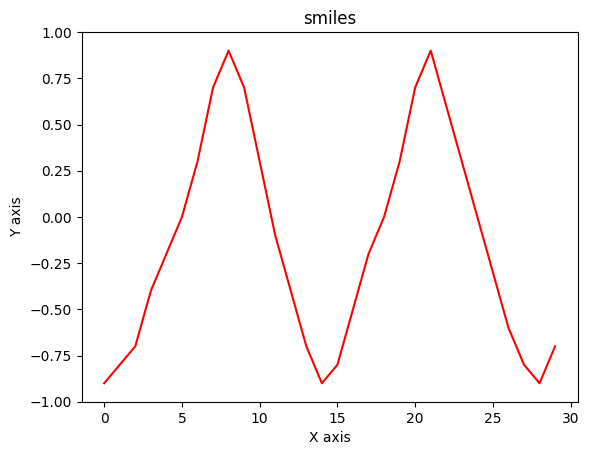

In [476]:
arr_to_plot = arr

# data to be plotted
#x = arr_to_plot[:,0]
y = arr_to_plot #[:,1]
 
# plotting
plt.title(first_file.display_name) 
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(y, color ="red") 
plt.ylim(-1, 1)
plt.show()